In [145]:
import numpy as np
import math
import pandas as pd
from sklearn import datasets
from random import seed
from random import choice

In [146]:
def euclidean(point,centroid):
    dist = math.sqrt(sum([(a-b) ** 2 for a,b in zip(point,centroid)]))
    return dist

def initialize_centroids(data, centroid_num):
    centroid = []
    seed(1)
    for _ in range (centroid_num):
        select = choice(data)
        centroid.append(select)
    return centroid

def assign_to_cluster(centroids, distance_list, data):
    cluster = min(distance_list, key=distance_list.get)
    return [cluster, data, centroids]

def calculate_mean_centroid(new_data, centroid):
    return np.array(new_data + centroid)/2

def kmeans(data, centroids, max_iter):
    cluster_list = []
    data_number = len(data)
    centroid_num = len(centroids)
    clusters = []

    for a in range(0, max_iter):

        before = centroids
        temp = []
        for data_idx in range(0, data_number):
            distance = {}

            for centroid_idx in range (0, centroid_num):
                distance[centroid_idx] = euclidean(data[data_idx], centroids[centroid_idx])

            cluster_list = assign_to_cluster(centroids, distance, data[data_idx])
            centroids[cluster_list[0]] = calculate_mean_centroid(cluster_list[1], centroids[cluster_list[0]])

            temp.append(cluster_list)

        #finish iteration
        if(np.array_equal(centroids, before)):
            clusters = temp
            return [clusters, centroids]

        if(a == (max_iter-1)):
            clusters = temp

    return clusters, centroids

def print_result(clusters, newcentroid):
    print("-----RESULT-----")
    for data in clusters:
        print("data: {}".format(data[1]))
        print("cluster number: {} \n".format(data[0]))
    print("NEW CENTROID: \n {}".format(newcentroid))

#### Initialize data and centroids

In [147]:
#load dataset iris
iris = datasets.load_iris()
data = iris.data

df = pd.DataFrame(data)
df.columns = iris.feature_names

In [148]:
#initialize random centroids
centroids = initialize_centroids(data, 3)

#### Kmeans

In [149]:
clusters, new_centroid = kmeans(data, centroids, 300)
print_result(clusters, new_centroid)

-----RESULT-----
data: [5.1 3.5 1.4 0.2]
cluster number: 0 

data: [4.9 3.  1.4 0.2]
cluster number: 0 

data: [4.7 3.2 1.3 0.2]
cluster number: 0 

data: [4.6 3.1 1.5 0.2]
cluster number: 0 

data: [5.  3.6 1.4 0.2]
cluster number: 0 

data: [5.4 3.9 1.7 0.4]
cluster number: 2 

data: [4.6 3.4 1.4 0.3]
cluster number: 0 

data: [5.  3.4 1.5 0.2]
cluster number: 0 

data: [4.4 2.9 1.4 0.2]
cluster number: 0 

data: [4.9 3.1 1.5 0.1]
cluster number: 0 

data: [5.4 3.7 1.5 0.2]
cluster number: 2 

data: [4.8 3.4 1.6 0.2]
cluster number: 0 

data: [4.8 3.  1.4 0.1]
cluster number: 0 

data: [4.3 3.  1.1 0.1]
cluster number: 0 

data: [5.8 4.  1.2 0.2]
cluster number: 2 

data: [5.7 4.4 1.5 0.4]
cluster number: 2 

data: [5.4 3.9 1.3 0.4]
cluster number: 2 

data: [5.1 3.5 1.4 0.3]
cluster number: 2 

data: [5.7 3.8 1.7 0.3]
cluster number: 2 

data: [5.1 3.8 1.5 0.3]
cluster number: 2 

data: [5.4 3.4 1.7 0.2]
cluster number: 2 

data: [5.1 3.7 1.5 0.4]
cluster number: 2 

data: [4.6 3.6 

#### Visualization

In [150]:
#Reduce 4D to 2D
from sklearn.decomposition import PCA
from sklearn import preprocessing

# perform principle component analysis
pca = PCA(n_components=2)
pc = pca.fit_transform(df)

# pca_c = PCA(n_components=2)
# pc_c = pca.fit_transform(np.array(new_centroid))


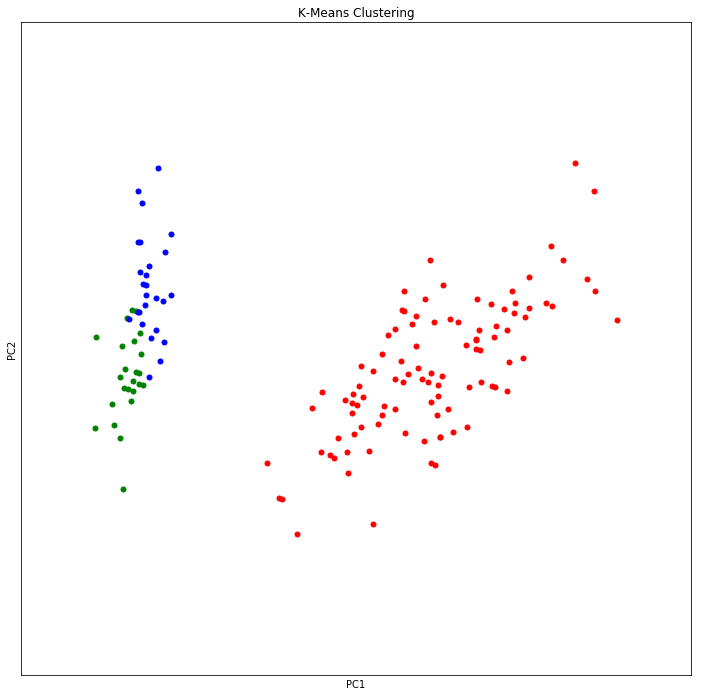

In [151]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 12))
plt.clf()

x_min, x_max = pc[:, 0].min() - 1, pc[:, 0].max() + 1
y_min, y_max = pc[:, 1].min() - 1, pc[:, 1].max() + 1

for i, point in enumerate(pc):
    if clusters[i][0] == 0:
        plt.plot(point[0], point[1], 'g.', markersize = 10)
    if clusters[i][0] == 1:
        plt.plot(point[0], point[1], 'r.', markersize = 10)
    if clusters[i][0] == 2:
        plt.plot(point[0], point[1], 'b.', markersize = 10)
        
# for j, ctr in enumerate(pc_c):
#     plt.plot(ctr[0], ctr[1], 'k.', markersize = 10)
        
plt.title('K-Means Clustering')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xticks(())
plt.yticks(())

plt.show()